# The Sparks Foundation Task 2 - _Color Identification in Images_

# IOT and Computer Vision intern

# Author : _Nagasoundarya.V_

# _Importing required libraries_

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
import argparse

# _Reading image_ 

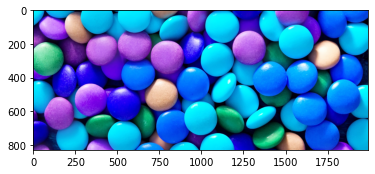

In [2]:
# When we read an image using cv2. imread() it interprets in BGR format by default.

image = cv2.imread('C:\Color\image.jpeg')
plt.imshow(image)

In [3]:
class ColorIdentification:
    def RGB_to_HEX(self,color):
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
    
    def get_image(self,image_path):
        image = cv2.imread('C:\Color\image.jpeg')
        
        # Converting BGR to RGB
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        return image
    
    def get_colors(self,image, number_of_colors, show_chart):
        image = image.reshape(image.shape[0]*image.shape[1], 3)
        
        clf = KMeans(n_clusters = 10)
        
        labels = clf.fit_predict(image)
        counts = Counter(labels)
        
        # sort to ensure correct color percentage
        counts = dict(sorted(counts.items()))
        center_colors = clf.cluster_centers_
        
        #rgb colors are got by iterating through the keys
        rgb_colors = [center_colors[i] for i in counts.keys()]
        hex_colors = [self.RGB_to_HEX(rgb_colors[i]) for i in counts.keys()]
        
        if (show_chart):
            plt.figure(figsize = (6, 6))
            plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,wedgeprops={"edgecolor":"0",'linewidth': 1})
        return rgb_colors

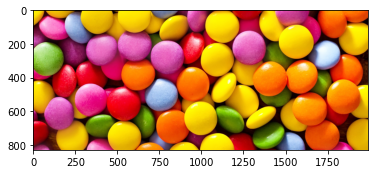

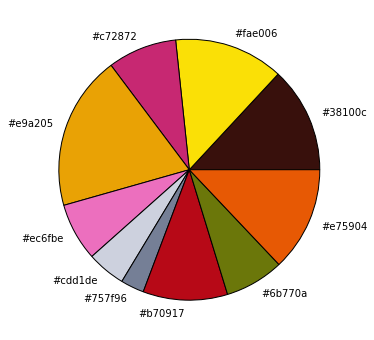

In [4]:
if __name__ == "__main__":
    img = 'img.jpeg'
    obj = ColorIdentification()
    color = obj.get_colors(obj.get_image(img), 8, True)